In [5]:
import numpy as np
from numpy.random import multinomial
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy.stats import bernoulli, beta, binom
%matplotlib inline

In [194]:
sum(np.repeat(float(1)/10,10))

0.99999999999999989

9

In [222]:
def policy(params, method):
    """
    
    1. policy to determine which machine to select
    2. returns 0 or 1
    3. inputs (a1,a2,b1,b2) should be integers
    4. method should be either exploitation, exploration or proportion
    
    """
    
    if method == 'exploit':
        return np.argmax([float(a)/(a+b) for (a,b) in params])
    elif method == 'explore':
        k = len(params)
        return np.argmax(multinomial(1,np.repeat(float(1)/k,k)))
    elif method == 'thompson':
        return np.argmax([beta.rvs(a,b) for (a,b) in params])
    

In [223]:
def thompson_sampler(method, N, K):
    """
    Implement Thompson Sampler
    
    Parameters
    -----
    
    method: exploit, explore, thompson
    N: number of iterations of the sampler
    K: number of machines
    
    Returns
    -----
    
    machine: array that holds the winning machine at each iteration
    sum(reward): the total reward
    theta: vector of parameters for each machine
    
    """
    
    # remove numpy warnings for indexing with non-integers
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        machine = np.empty(N)
        reward = np.empty(N)
        
        theta = np.ones(2*K).reshape(K,2) # prior is beta(1,1) for each machine

        for t in range(N):

            machine[t] = policy(theta, method)

            # beta posterior expected value
            reward_theta = float(theta[machine[t]][0])/( np.sum(theta[machine[t]]) )

            reward[t] = bernoulli.rvs(reward_theta)

            if reward[t] == 1:
                theta[machine[t]][0] += 1 
            else:
                theta[machine[t]][1] += 1
            
        return machine, sum(reward), theta

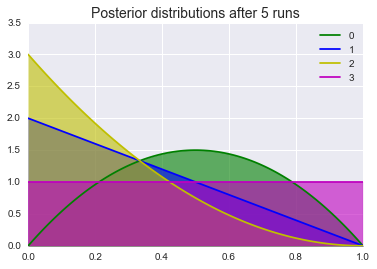

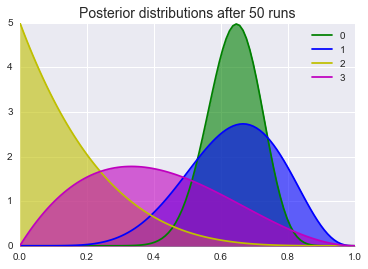

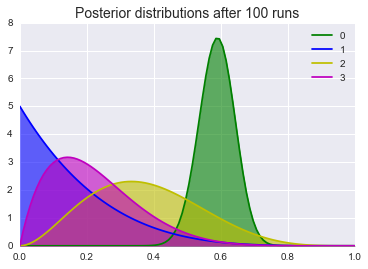

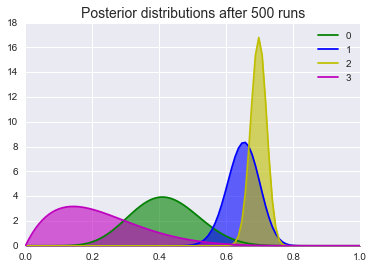

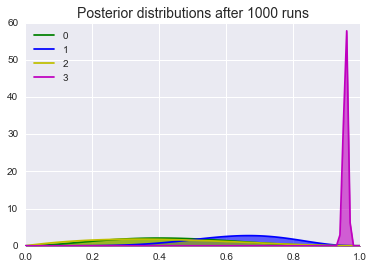

In [224]:
xvals = np.linspace(0,1,100)
f = lambda x: beta.pdf(x, param[0], param[1])

np.random.seed(111)
N = [5,50,100,500,1000] # number of iterations
K = 4 # number of machines

xvals = np.linspace(0,1,100)
colors = ["g","b","y","m","c"]

for num in N:
    
    machines, R, theta = thompson_sampler('thompson', num, K)
    
    for e, param in enumerate(theta):
        
        f = lambda x: beta.pdf(x, param[0], param[1])
        
        plt.title("Posterior distributions after {} runs".format(num), size=14)
        plt.plot(xvals, f(xvals), color = colors[e], label = e)
        plt.fill_between(xvals,f(xvals), alpha=0.6, color = colors[e])
        plt.legend(loc='best')
        
        
    plt.show()

In [261]:
explore_list = []
exploit_list = []
thompson_list = []

for num in range(100):
    
    explore_list.append(thompson_sampler('explore', 100, K)[1])
    exploit_list.append(thompson_sampler('exploit', 100, K)[1])
    thompson_list.append(thompson_sampler('thompson', 100, K)[1])

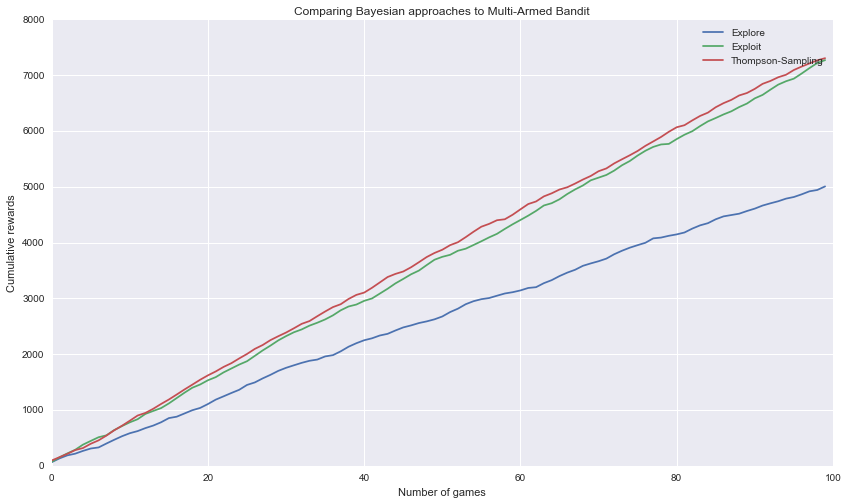

In [262]:
plt.figure(figsize=(14,8))
plt.title("Comparing Bayesian approaches to Multi-Armed Bandit")
plt.ylabel("Cumulative rewards")
plt.xlabel("Number of games")
plt.plot(np.cumsum(explore_list))
plt.plot(np.cumsum(exploit_list))
plt.plot(np.cumsum(thompson_list))
plt.legend(['Explore','Exploit','Thompson-Sampling'])
plt.show()

In [1]:
"""
UCB Algorithm
"""

# assume 3 machines played once each, and each one wins first try
results = {0: {'n' : 1, 'r' : 1},
           1: {'n' : 1, 'r' : 1},
           2: {'n' : 1, 'r' : 1} }

machine_reward = np.array([0.9,0.5,0.5])
machine_list = [0,1,2]



R = 0

for t in range(3,300):
    
    for m in machine_list:
        results[m]['r'] = float(results[m]['r'])/results[m]['n'] + np.sqrt(2*np.log(t)/results[m]['n'])
    
    machine = np.argmax([v['r'] for k,v in results.items()])
    
    R += bernoulli.rvs(machine_reward[machine])
    
    results[machine]['r'] += R
    results[machine]['n'] += 1

    
print results

NameError: name 'np' is not defined